## WeatherPy

The objective of this exercise is to plot various weather characteristics of randomly selected cities against those cities' latitude in order to demonstrate whether proximity to the equator correlates with temperature, wind speed, humidity, and cloudiness.

Based on the data below, here are a few of the observable trends:

- There is a strong correlation between proximity to the equator and temperature.
- Points show much less association between other characteristics, like wind speed and humidity, and latitude. The points are much more evenly distributed, suggesting that the association between and proximity to the equator is is stronger than between proximity to the equator and other measurements.
- Cities South of the equator may be more likely to have a higher humidity regardless of proximity to the equator - there are more points with lower humidities north of the equator, according to the humidity plot.

In [1]:
#Import a BUNCH of libraries and the API key for Open Weather Map API
import json
import os
import requests
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from citipy import citipy
from config import api_key
import time
import seaborn as sns
sns.set()

#Establish lists to store weather data
lat_list = []
temp_list = []
city_list = []
country_list = []
city_id_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
city_no_counter = 0

#Look back to one week ago, selecting a 24 hour period with start and end times
current_time = time.time()
pull_time_start = current_time - 691200
pull_time_end = current_time - 604800

#Specify font formatting for plots
plot_title_fonts = {'family':'sans-serif', 'size':18}
axis_label_fonts = {'family':'sans-serif', 'size':14}  

In [2]:
#Create exception for duplicate entries to ensure unique entries and aid the script in dealing with duplicates

class Error(Exception):
   pass

class ValueNotUnique(Error):
   pass


In [3]:
#Pull data! While loop ensures that the final set of city data includes the number of entries desired
while len(set(city_id_list)) < 500:
    try:
        current_lat = round(random.uniform(-90.0, 90.0), 6)
        current_lon = round(random.uniform(-180.0, 180), 6)
        current_city = citipy.nearest_city(current_lat, current_lon).city_name
        current_country = citipy.nearest_city(current_lat, current_lon).country_code
        query_url = f"http://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units=imperial&q={current_city},{current_country}&type=hour&start={pull_time_start}&end={pull_time_end}"
        per_city_json = requests.get(query_url).json()
        #If there is no city ID, data is not qualified - skip entry
        if per_city_json['id']:
            #If the city ID already exists in the list, data is not qualified skip entry
            if per_city_json['id'] in set(city_id_list):
                #Let user know that the loop has been restarted
                print("City returned already exists in list - retrying a new entry.")
                raise ValueNotUnique
                break
            #If the city ID exists and is unique, add city data to city data lists    
            else:
                city_id_list.append(per_city_json['id'])
                lat_list.append(per_city_json['coord']['lat'])
                temp_list.append(per_city_json['main']['temp'])
                current_city = per_city_json['name']
                city_list.append(current_city)
                country_list.append(per_city_json['sys']['country'])
                humidity_list.append(per_city_json['main']['humidity'])
                cloudiness_list.append(per_city_json['clouds']['all'])
                wind_speed_list.append(per_city_json['wind']['speed'])
                city_no_counter = city_no_counter + 1
                #Print current status of data pull
                print(f"Currently processing city no. {city_no_counter}:\n{current_city}, {current_country}\nCity ID: {per_city_json['id']}\nRequest URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q={current_city},{current_country}&type=hour&start={pull_time_start}&end={pull_time_end}")
        #Determine whether or not an undesirable code has been returned - if so, pause data pull to prevent running
        #into caps
        else:
            cod = cod = per_city_json['cod']
            if cod != 200:
                time.sleep(60)
                #Let user know the script is on hold
                print('Waiting 1 minute before next API call.')
            else:
                print('No City ID returned - retrying a new entry.')
                pass
    #If there is an exception, restart while loop        
    except:
        pass



Currently processing city no. 1:
Kapaa, us
City ID: 5848280
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Kapaa,us&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 2:
Laibin, cn
City ID: 1804609
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Laibin,cn&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 3:
Albany, au
City ID: 2077963
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Albany,au&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 4:
Port Moresby, pg
City ID: 2088122
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Port Moresby,pg&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 5:
Hithadhoo, mv
Cit

Currently processing city no. 34:
Alpena, us
City ID: 4984075
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Alpena,us&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 35:
Paamiut, gl
City ID: 3421193
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Paamiut,gl&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 36:
Teahupoo, pf
City ID: 4033543
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Teahupoo,pf&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 37:
Lanigan, ca
City ID: 6049515
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperi

Currently processing city no. 63:
Severo-Kurilsk, ru
City ID: 2121385
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Severo-Kurilsk,ru&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 64:
Bredasdorp, za
City ID: 1015776
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Bredasdorp,za&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
Currently processing city no. 65:
Fortuna, us
City ID: 5563839
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Fortuna,us&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 66:
Georgetown, sh
City ID: 2411397
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Georgetown,sh&type=hour&start=152

Currently processing city no. 91:
Palmer, us
City ID: 5871146
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Palmer,us&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 92:
Ahipara, nz
City ID: 2194098
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Ahipara,nz&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
Currently processing city no. 93:
Caohai, cn
City ID: 1816028
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Caohai,cn&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
Currently processing city no. 94:
Henties Bay, na
City ID: 3356832
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperi

Currently processing city no. 116:
Jamestown, sh
City ID: 3370903
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Jamestown,sh&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 117:
Vila Franca do Campo, pt
City ID: 3372472
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Vila Franca do Campo,pt&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 118:
Lazaro Cardenas, mx
City ID: 3996234
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Lazaro Cardenas,mx&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 119:
Lisala, cd
City ID: 211734
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Lisala,cd&type=hour&start=1521929489.4773319&end=1522015889.4773319
C

Currently processing city no. 145:
Ancud, cl
City ID: 3899695
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Ancud,cl&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 146:
Pandan, ph
City ID: 1695555
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Pandan,ph&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 147:
Omsukchan, ru
City ID: 2122493
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=i

Currently processing city no. 172:
Port Blair, in
City ID: 1259385
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Port Blair,in&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 173:
Beringovskiy, ru
City ID: 2126710
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Beringovskiy,ru&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 174:
Portland, au
City ID: 2152668
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather

City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 201:
Bathsheba, bb
City ID: 3374083
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Bathsheba,bb&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
Currently processing city no. 202:
Flinders, au
City ID: 6255012
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Flinders,au&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 203:
Lompoc, us
City ID: 5367788
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRE

City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 224:
Linjiang, cn
City ID: 2036069
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Linjiang,cn&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 225:
Izumo, jp
City ID: 1861084
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Izumo,jp&type=hour&start=1521929489.477331

City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 248:
Pathardi, in
City ID: 1260135
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Pathardi,in&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 249:
Bumba, cd
City ID: 217745
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Bumba,cd&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
Currently processing city no. 250:
Meiktila, mm
City ID: 1309793
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Meiktila,mm&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - r

City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 273:
Bykovo, ru
City ID: 570315
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Bykovo,ru&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 274:
Shushtar, ir
City ID: 114584
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Shushtar,ir&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
Currently processing city no. 275:
Kurunegala, lk
City ID: 1237980
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Kurunegala,lk&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
Currently processing city no. 276:


City returned already exists in list - retrying a new entry.
Currently processing city no. 294:
Tilichiki, ru
City ID: 2120591
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Tilichiki,ru&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 295:
Bilma, ne
City ID: 2446796
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Bilma,ne&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
Currently processing city no. 296:
Mae Sai, th
City ID: 1152194
Request URL (minus API key): ht

City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 313:
Taoudenni, ml
City ID: 2450173
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Taoudenni,ml&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 314:
Kyabram, au
City ID: 2160910
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Kyabram,au&type=hour&start=1521929489.

City returned already exists in list - retrying a new entry.
Currently processing city no. 335:
Poya, nc
City ID: 2138522
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Poya,nc&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 336:
Zwedru, lr
City ID: 2272491
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Zwedru,lr&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 337:
Taloqan, af
City ID: 1123004
Request URL (minus API key): http://api

City returned already exists in list - retrying a new entry.
Currently processing city no. 357:
Kailua, us
City ID: 5847486
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Kailua,us&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 358:
Kharakvasla, in
City ID: 1266966
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Kharakvasla,in&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 359:
Sinnai, it
City ID: 6539309
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Sinnai,it&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 360:
Adrar, dz
City ID: 2508813
Request URL (minus API key): http:

Currently processing city no. 381:
Turbat, pk
City ID: 1163054
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Turbat,pk&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 382:
Nikolayevka, ru
City ID: 488635
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Nikolayevka,ru&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
Currently processing city no. 383:
Melfort, ca
City ID: 6071876
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Melfort,ca&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
Currently processing city no. 384:
Sai Buri, th
City ID: 1606851
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&un

Currently processing city no. 408:
Ati, td
City ID: 2436400
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Ati,td&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 409:
Roberval, ca
City ID: 6125653
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units

City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 430:
Kieta, pg
City ID: 2094027
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Kieta,pg&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 431:
Punta Alta, ar
City ID: 3429886
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Punta Alta,ar&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 432:
Eseka, cm
City ID: 2231881
Request URL (minus API key): ht

City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 453:
Ridgecrest, us
City ID: 5387494
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Ridgecrest,us&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 454:
Nowa Deba, pl
City ID: 763783
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Nowa Deba,pl&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 455:
Melipilla, cl
City ID: 3880107
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Melipilla,cl&type=hour&start=1521929489.4773319&end=1522015889.4773319
Currently processing city no. 456:
Ketchikan, us
City ID: 5554428
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=

City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 477:
Samfya, zm
City ID: 899274
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Samfya,zm&type=hour&start=1521929489.4773319&end=1522015889.4773319
City returned already exists in list - retrying a new entry.
City returned already exists in list - retrying a new entry.
Currently processing city no. 478:
Te Kauwhata, nz
City ID: 2181511
Request URL (minus API ke

City returned already exists in list - retrying a new entry.
Currently processing city no. 500:
Machico, pt
City ID: 2266895
Request URL (minus API key): http://api.openweathermap.org/data/2.5/weather?APPID=SECRET&units=imperial&q=Machico,pt&type=hour&start=1521929489.4773319&end=1522015889.4773319


# One note on the method used to gather this data:

There is a MUCH faster way to gather this data. While this code allows for a random pull, checked for uniqueness, this particular API offers a list of all City ID entries. It is much faster to select a number and use random.choice() to select City IDs and then look up results by City ID. This allows us to ensure that each City ID is a unique value before we pull our data. However, this does not include citipy's filter for cities over population 500 - the one notable drawback to the alternate method.

In [4]:
#Create and organize DataFrame
rand_weather_pull_df = pd.DataFrame({'City':city_list,'City ID':city_id_list,'Country':country_list,'Temperature':temp_list,'Latitude':lat_list,'Humidity': humidity_list,'Wind Speed': wind_speed_list,'Cloudiness': cloudiness_list})
rand_weather_pull_df = rand_weather_pull_df[['City','Country','City ID','Latitude','Temperature','Wind Speed','Humidity','Cloudiness']]
rand_weather_pull_df.head()

,City,Country,City ID,Latitude,Temperature,Wind Speed,Humidity,Cloudiness
0,Kapaa,US,5848280,22.08,75.20,4.03,88,75
1,Laibin,CN,1804609,23.74,67.29,2.80,94,20
2,Albany,AU,2077963,-35.02,47.26,3.47,88,0
3,Port Moresby,PG,2088122,-9.47,75.20,5.82,100,20
4,Hithadhoo,MV,1282256,-0.60,85.69,9.28,99,80


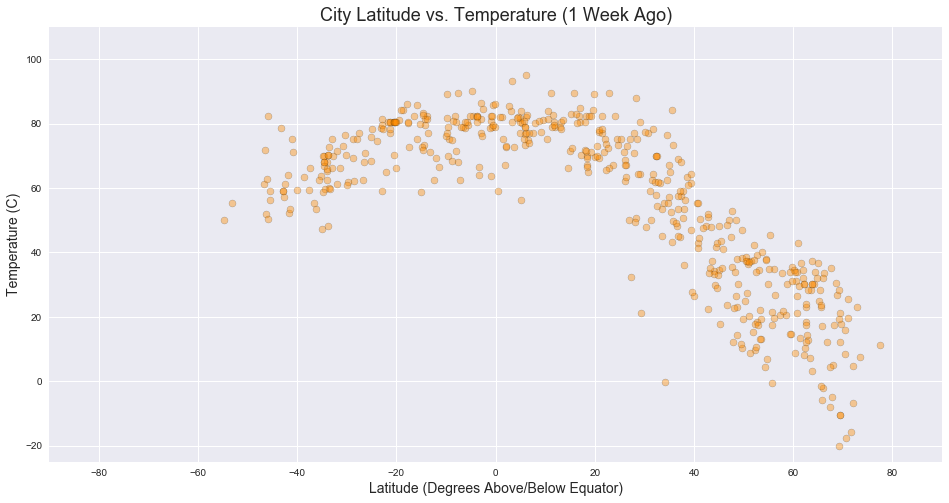

In [5]:
#Plot temperature against latitude
weather_plot, temp = plt.subplots(figsize=(16,8))

temp.scatter(x=rand_weather_pull_df['Latitude'], y=rand_weather_pull_df['Temperature'], alpha=0.4, edgecolors='k',
            color='darkorange')
temp.set_title('City Latitude vs. Temperature (1 Week Ago)', fontdict=plot_title_fonts)
temp.set_ylabel('Temperature (C)', fontdict=axis_label_fonts)
temp.set_xlabel('Latitude (Degrees Above/Below Equator)', fontdict=axis_label_fonts)
temp.set_xlim(-90,90)
temp.set_ylim(-25,110)

#Save plot
temp_plot_save_path = os.path.join("saved-figures", "temp_plot.png")
plt.savefig(temp_plot_save_path, dpi=300)

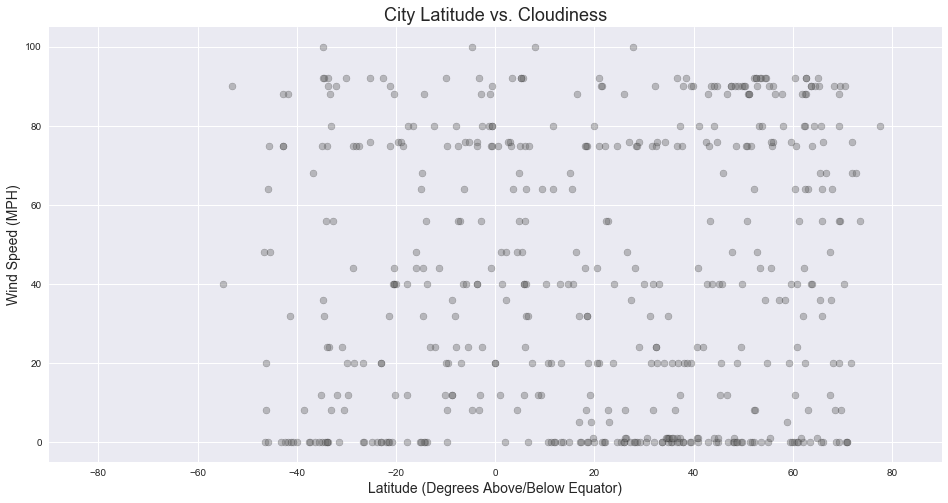

In [6]:
#Plot cloudiness against latitude
weather_plot, cloud = plt.subplots(figsize=(16,8))

cloud.scatter(x=rand_weather_pull_df['Latitude'], y=rand_weather_pull_df['Cloudiness'], alpha=0.4, edgecolors='k',
             color='dimgray')
cloud.set_title('City Latitude vs. Cloudiness', fontdict=plot_title_fonts)
cloud.set_ylabel('Wind Speed (MPH)', fontdict=axis_label_fonts)
cloud.set_xlabel('Latitude (Degrees Above/Below Equator)', fontdict=axis_label_fonts)
cloud.set_xlim(-90,90)
cloud.set_ylim(-5,105)

#Save plot
cloud_plot_save_path = os.path.join("saved-figures", "cloud_plot.png")
plt.savefig(cloud_plot_save_path, dpi=300)

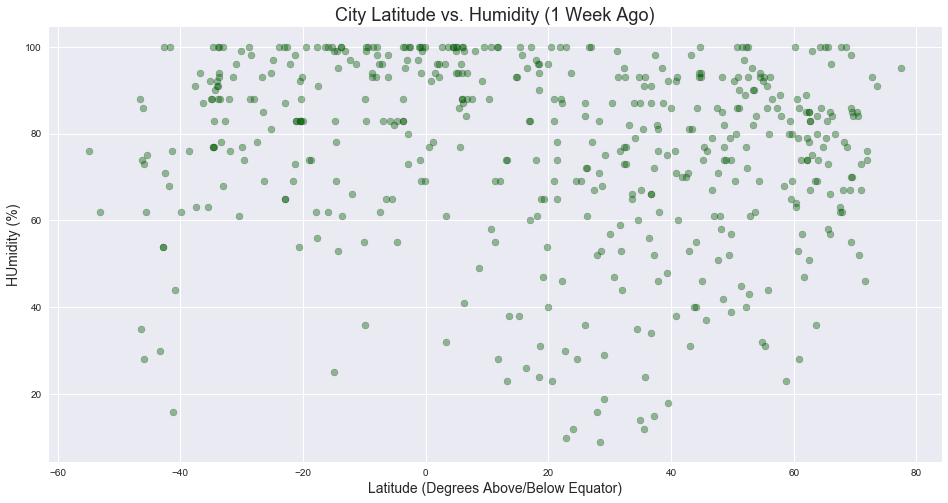

In [7]:
#Plot humidity against latitude
weather_plot, humid = plt.subplots(figsize=(16,8))
humid.scatter(x=rand_weather_pull_df['Latitude'], y=rand_weather_pull_df['Humidity'], alpha=0.4, edgecolors='k',
             color='darkgreen')
humid.set_title('City Latitude vs. Humidity (1 Week Ago)', fontdict=plot_title_fonts)
humid.set_ylabel('HUmidity (%)', fontdict=axis_label_fonts)
humid.set_xlabel('Latitude (Degrees Above/Below Equator)', fontdict=axis_label_fonts)
temp.set_xlim(-90,90)
temp.set_ylim(-5,105)

#Save plot
humid_plot_save_path = os.path.join("saved-figures", "humid_plot.png")
plt.savefig(humid_plot_save_path, dpi=300)

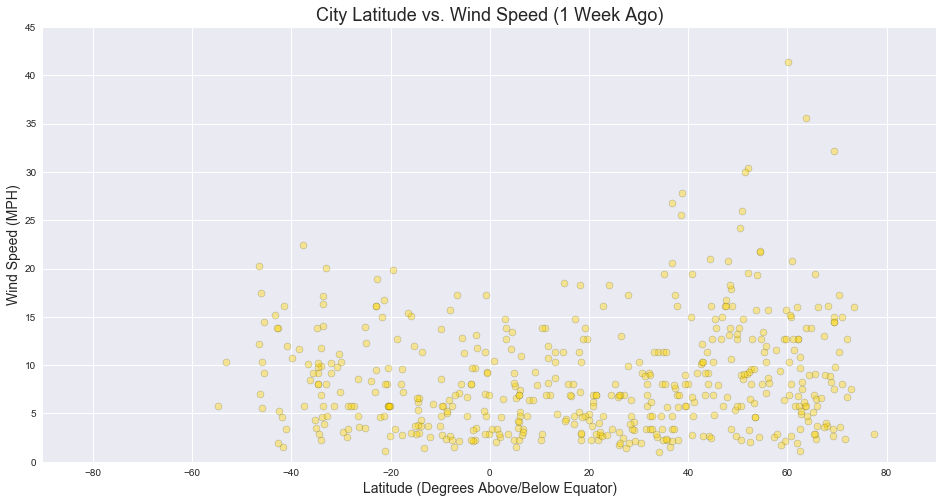

In [8]:
#Plot wind speed against latitude
weather_plot, wind = plt.subplots(figsize=(16,8))
wind.scatter(x=rand_weather_pull_df['Latitude'], y=rand_weather_pull_df['Wind Speed'], alpha=0.4, edgecolors='k',
            color='gold')
wind.set_title('City Latitude vs. Wind Speed (1 Week Ago)', fontdict=plot_title_fonts)
wind.set_ylabel('Wind Speed (MPH)', fontdict=axis_label_fonts)
wind.set_xlabel('Latitude (Degrees Above/Below Equator)', fontdict=axis_label_fonts)
wind.set_xlim(-90,90)
wind.set_ylim(0,45)

#Save plot
wind_plot_save_path = os.path.join("saved-figures", "wind_plot.png")
plt.savefig(wind_plot_save_path, dpi=300)

In [10]:
#Save DataFrame as csv
save_csv_path = os.path.join('weatherpy.csv')
rand_weather_pull_df.to_csv(save_csv_path, index=False)
